### <font color='blue'> Deep Learning with Python</font>
##### by François Chollet
* ###### **Keras** creator and Google AI researcher
* ##### [Source code on Github](https://github.com/fchollet/deep-learning-with-python-notebooks)
***

## First look at a neural network
##### MNIST
* 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s
* You can think of “solving” MNIST as the “Hello World” of deep learning.

#### *Note on classes and labels*

* In machine learning, a *category* in a *classification problem* is called a **class**. Data
points are called *samples*. The class associated with a specific sample is called a
**label**.

#### Workflow

* build a *neural network model*
* feed the *neural network* the training data, train_images and train_labels.
* The network will then learn to associate images and labels.
* Finally, we’ll ask the network to produce predictions for test_images, and we’ll
verify whether these predictions match the labels from test_labels.

In [1]:
import keras
keras.__version__

'2.4.3'

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

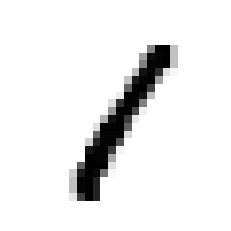

In [9]:
# by blee 09/30/20 from Hand on 03_classification
#mnist.keys()
train_labels[0]
train_images.shape

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = train_images[3]

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

##### three more things, as part of the compilation step

* A loss function—How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.
* An optimizer—The mechanism through which the network will update itself
based on the data it sees and its loss function.
* Metrics to monitor during training and testing—Here, we’ll only care about accuracy
(the fraction of the images that were correctly classified).

In [4]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [5]:
# scaling 28*28 to [0, 1] interval
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
# categorically encoding the labels

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# trining
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2548 - accuracy: 0.9264

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 566us/step - loss: 0.0871 - accuracy: 0.9730


In [9]:
print('test_acc:', test_acc)

test_acc: 0.9729999899864197
